In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import numpy as np

import sentinelhub
import geopandas as gpd
from sentinelhub import UtmZoneSplitter, BBoxSplitter, BBox, CRS, DataCollection, UtmGridSplitter
import pyproj
import rasterio as rio

from pyspatialkit.spacedescriptors.georect import GeoRect
from pyspatialkit.storage.geostorage import GeoStorage
from pyspatialkit.dataobjects.georaster import GeoRaster

In [57]:
storage = GeoStorage(directory_path='./geostorage')
raster1 = GeoRaster.from_file("../testdata/dop100rgbi_32_734_5748_2_st_2020.tif", band=[1,2,3])
raster2 = GeoRaster.from_file("../testdata/dop100rgbi_32_736_5748_2_st_2020.tif", band=[1,2,3])
raster_layer = storage.add_raster_layer('raster_layer', 3, raster1.dtype, crs=raster1.crs, bounds=[732215,5747667, 737543,5750536])
raster_layer.writer_raster_data(raster1)
#raster_layer.writer_raster_data(raster2)

A layer with name raster_layer already exists, returning existing layer.
got bounds:[ 734000 5747999  736000 5749999]
to Indexes:[ 537 1785 2537 3785]
db request took: 0.21519136428833008
backend request took: 0.21763277053833008
aligned
(2000, 2000)
got bounds:[ 734000 5747999  736000 5749999]
to Indexes:[ 537 1785 2537 3785]
[ 536 1784 2538 3786]
(2002, 2002, 3)
[ 268  892 1270 1894]
(1002, 1002, 3)
[134 446 636 948]
(502, 502, 3)
[ 66 222 318 474]
(252, 252, 3)
[ 32 110 160 238]
(128, 128, 3)
[ 16  54  80 120]
(64, 66, 3)
[ 8 26 40 60]
(32, 34, 3)
[ 4 12 20 30]
(16, 18, 3)
[ 2  6 10 16]
(8, 10, 3)
[0 2 6 8]
(6, 6, 3)
[0 0 4 4]
(4, 4, 3)
[0 0 2 2]
(2, 2, 3)


In [82]:
bbox_splitter = UtmGridSplitter([test_shape], gdf.crs, 500)

/opt/conda/envs/env/lib/python3.7/site-packages/sentinelhub/areas.py:105: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return shapely.ops.cascaded_union(shape_list)


In [90]:
gdf = gpd.read_file("../testdata/test_area.shp")
gdf = gdf.to_crs(raster_layer.crs.proj_crs)
test_shape = gdf.geometry[0]
bbox_splitter = BBoxSplitter([test_shape], gdf.crs, 5)
bbox_list = np.array(bbox_splitter.get_bbox_list())
rect = GeoRect.from_sentinelhub_bbox(bbox_list[5])
rect.transform

/opt/conda/envs/env/lib/python3.7/site-packages/sentinelhub/areas.py:105: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return shapely.ops.cascaded_union(shape_list)


array([[ 6.75631799e+02, -1.26776285e-07,  7.34830921e+05],
       [ 0.00000000e+00,  3.70738634e+02,  5.74837071e+06],
       [ 0.00000000e+00, -1.72306613e-13,  1.00000000e+00]])

In [91]:
rect.crs.proj_crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

got bounds:[ 734830 5748370  735506 5748741]
to Indexes:[1795 2615 2166 3291]
db request took: 0.22800135612487793
backend request took: 0.23213434219360352
aligned
(371, 676)
reshape aligned
resize took: 0.2285912036895752


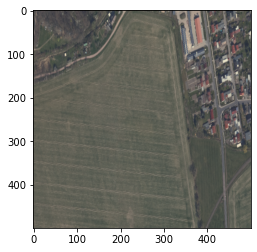

In [92]:
rect = GeoRect.from_sentinelhub_bbox(bbox_list[5])
georaster = raster_layer.get_raster_for_rect(rect, [500,500])
georaster.plot()

In [93]:
rect.transform

array([[ 6.75631799e+02, -1.26776285e-07,  7.34830921e+05],
       [ 0.00000000e+00,  3.70738634e+02,  5.74837071e+06],
       [ 0.00000000e+00, -1.72306613e-13,  1.00000000e+00]])

In [94]:
georaster.to_file("test.tif", ignore_not_affine=True)